In [43]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
import torch 
from sklearn.preprocessing import StandardScaler
from torch import nn
from torch.utils.data import DataLoader

In [127]:
from adjustText import adjust_text

In [5]:
df=pd.read_csv('To_Github/all_data_new_version_for_prediction_G.csv')

In [11]:
#df=pd.read_csv('all_data_new_version_!mean_for_prediction_G.csv')

In [13]:
df[:1]

,Unnamed: 0,name,delta_e,ntypes,volume,Number,MendeleevNumber,AtomicWeight,MeltingT,Column,...,NValence1,NdUnfilled1,NfUnfilled1,NUnfilled1,GSvolume_pa1,GSbandgap1,SpaceGroupNumber1,nB,H,H_rep
0,0,Ti20H2N17,-1.74387,3,379.154163,22.0,43.0,47.867,1941.0,4.0,...,5.0,0.0,0.0,3.0,14.76875,6.437,194.0,17,2,1.0


In [24]:
df_rm=df[["H",'nA','AtomicWeight',"nB","AtomicWeight1"]]

In [25]:
df_rm

,H,nA,AtomicWeight,nB,AtomicWeight1
0,2,20,47.867000,17,14.0067
1,3,1,40.078000,1,106.4200
2,2,1,9.012182,0,0.0000
3,2,1,150.360000,0,0.0000
4,5,3,74.921600,10,15.9994
...,...,...,...,...,...
2846,4,1,87.620000,1,173.0540
2847,2,1,173.054000,0,0.0000
2848,5,3,85.467800,1,173.0540
2849,3,1,85.467800,1,65.3800


In [36]:
grm =  lambda H, M_H, nA, M_A , nB, M_B : (H*M_H)/(H*M_H + nA*M_A + nB*M_B)*100

In [37]:
M_H=1.00784 

In [41]:
df["Gv (wt%)"]=grm(df['H'],M_H,df["nA"],df["AtomicWeight"],df['nB'],df['AtomicWeight1'])

In [39]:
df

,Unnamed: 0,name,delta_e,ntypes,volume,Number,MendeleevNumber,AtomicWeight,MeltingT,Column,...,NdUnfilled1,NfUnfilled1,NUnfilled1,GSvolume_pa1,GSbandgap1,SpaceGroupNumber1,nB,H,H_rep,Gv
0,0,Ti20H2N17,-1.743870,3,379.154163,22.0,43.0,47.867000,1941.00,4.0,...,0.0,0.0,3.0,14.76875,6.437,194.0,17,2,1.00000,0.168328
1,1,CaH3Pd,-0.514892,3,50.929335,20.0,7.0,40.078000,1115.00,2.0,...,0.0,0.0,0.0,14.41000,0.000,225.0,1,3,92.00000,2.022130
2,2,BeH2,-0.166498,2,140.319142,4.0,67.0,9.012182,1560.00,2.0,...,0.0,0.0,0.0,0.00000,0.000,0.0,0,2,1.00794,18.278067
3,3,SmH2,-0.767608,2,38.864183,62.0,23.0,150.360000,1345.00,3.0,...,0.0,0.0,0.0,0.00000,0.000,0.0,0,2,14.01000,1.322836
4,4,As3(HO2)5,-1.459528,3,185.324892,33.0,84.0,74.921600,1090.00,15.0,...,0.0,0.0,2.0,9.10500,0.000,12.0,10,5,1.00000,1.292772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2846,2846,SrYbH4,-0.453794,3,161.089000,38.0,8.0,87.620000,1050.00,2.0,...,0.0,0.0,0.0,34.12000,0.000,225.0,1,4,1.00000,1.522961
2847,2847,YbH2,-0.556308,2,151.590000,70.0,39.0,173.054000,1092.00,3.0,...,0.0,0.0,0.0,0.00000,0.000,0.0,0,2,6.61500,1.151359
2848,2848,Rb3YbH5,-0.160148,3,396.541000,37.0,4.0,85.467800,312.46,1.0,...,0.0,0.0,0.0,34.12000,0.000,225.0,1,5,7.85300,1.159779
2849,2849,RbZnH3,-0.063820,3,374.449000,37.0,4.0,85.467800,312.46,1.0,...,0.0,0.0,0.0,13.96000,0.000,194.0,1,3,194.00000,1.964967


In [42]:
df[df['name']=="MgH2"]

,Unnamed: 0,name,delta_e,ntypes,volume,Number,MendeleevNumber,AtomicWeight,MeltingT,Column,...,NfUnfilled1,NUnfilled1,GSvolume_pa1,GSbandgap1,SpaceGroupNumber1,nB,H,H_rep,Gv,Gv (wt%)
119,119,MgH2,-0.294409,2,59.972803,12.0,68.0,24.305,923.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0,2,194.0,7.658161,7.658161
1854,1854,MgH2,-0.068888,2,137.627000,12.0,68.0,24.305,923.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0,2,0.0,7.658161,7.658161


/home/hamza/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/tmp/ipykernel_23786/974415745.py:3: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.xticks([])


([], [])

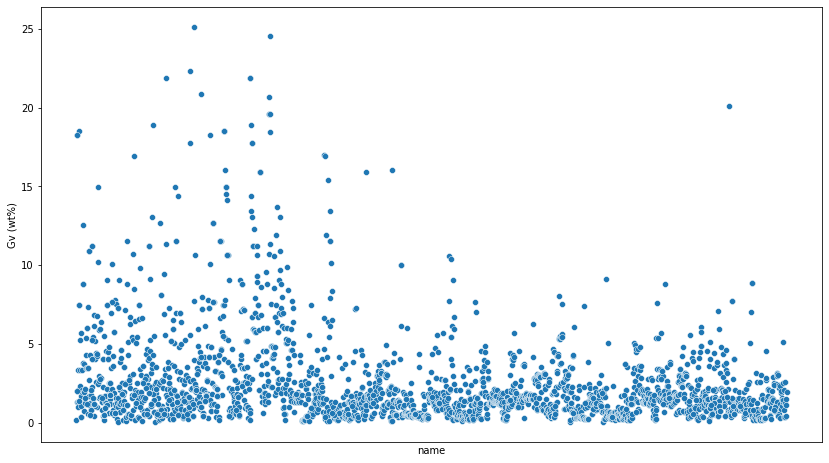

In [69]:
plt.figure(figsize=(14,8))
sns.scatterplot(df['name'],df["Gv (wt%)"])
plt.xticks([])

In [72]:
class  MaterialsData(torch.utils.data.Dataset):
    def  __init__(self, X,y,scale_data=True):
        
        if not torch.is_tonsor(X)  and not torch.is_tensor(y):
            if scale_data:
                X=StandardScaler().fit_transform(X)
                y=StandardScaler().fit_transform(y)
            self.X=torch.from_numpy(X)
            self.y=torch.from_numpy(y)
            
    def  __len__(self):
        return   len(self.X)
    def __gititem__(self,i):
        return self.X[i], self.y[i]

In [82]:
compounds=[]
with open("cluster_n2.txt",'r') as fp:
    for Mtr in fp:
        compounds.append(Mtr.strip())

In [94]:
compounds[0][:compounds[0].index(".")]

'Ti20H2N17'

9

In [95]:
for i in   range(len(compounds)):
    compounds[i] =compounds[i][:compounds[i].index(".")]

In [98]:
len(df)

2851

In [100]:
ss=[df["name"][i] in compounds  for i in range(len(df["name"]))]

In [102]:
df["compounds_H"]=ss

In [104]:
df_H=df[df['compounds_H']==True]

In [ ]:
 "MgH2","LaNi5H6",
"FeTiH2",
"Mg2NiH4",
"ZrMn2H2",
"LiBH4",
"NaBH4",
"KBH4",
"LiAlH4",
"NaAlH4",
"KAlH4",
"Mg(AlH4)2",

In [146]:
df_H_high_Gravimetric=df_H[df_H["Gv (wt%)"]>7]

In [147]:
df_H_high_Gravimetric

,Unnamed: 0,name,delta_e,ntypes,volume,Number,MendeleevNumber,AtomicWeight,MeltingT,Column,...,NUnfilled1,GSvolume_pa1,GSbandgap1,SpaceGroupNumber1,nB,H,H_rep,Gv,Gv (wt%),compounds_H
2,2,BeH2,-0.166498,2,140.319142,4.0,67.0,9.012182,1560.00,2.0,...,0.0,0.00000,0.000,0.0,0,2,1.00794,18.278067,18.278067,True
7,7,LiBH4,-0.450210,3,209.370399,3.0,1.0,6.941000,453.69,1.0,...,5.0,7.17250,1.524,166.0,1,4,0.00000,18.506603,18.506603,True
8,8,NaAlH4,-0.249924,3,134.152269,11.0,2.0,22.989769,370.87,1.0,...,5.0,16.48000,0.000,225.0,1,4,1.00000,7.465113,7.465113,True
21,21,LiH2N,-0.592202,3,124.222791,3.0,1.0,6.941000,453.69,1.0,...,3.0,14.76875,6.437,194.0,1,2,0.00000,8.777802,8.777802,True
23,23,SiH4,-0.130738,2,274.768427,14.0,78.0,28.085500,1687.00,14.0,...,0.0,0.00000,0.000,0.0,0,4,1.00000,12.552161,12.552161,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2669,2669,H4SO,-0.402679,3,39.858000,16.0,88.0,32.065000,388.36,16.0,...,2.0,9.10500,0.000,12.0,1,4,194.00000,7.738365,7.738365,True
2704,2704,H30S2O21,-1.248971,3,402.064000,16.0,88.0,32.065000,388.36,16.0,...,2.0,9.10500,0.000,12.0,21,30,1.00000,7.025681,7.025681,True
2705,2705,H18SO12,-1.244540,3,493.683000,16.0,88.0,32.065000,388.36,16.0,...,2.0,9.10500,0.000,12.0,12,18,31.00000,7.490174,7.490174,True
2710,2710,PH3,-0.055597,2,192.975000,15.0,83.0,30.973762,317.30,15.0,...,0.0,0.00000,0.000,0.0,0,3,0.00000,8.893417,8.893417,True


In [262]:
def plotscatter(df):
    df.index=[ i for i in range(len(df))]
    plt.figure(figsize=(14,8))
    sns.scatterplot(df["H"],df["Gv (wt%)"],color="yellow")
    Texts=[plt.text(df["H"][i],df["Gv (wt%)"][i],df['name'][i]) for i in range(0,len(df)) if (df["Gv (wt%)"][i] >=12.5) ]
    Texts+=(plt.text(df["H"][i],df["Gv (wt%)"][i],df['name'][i]) for i in range(0,len(df),10) if ( df["Gv (wt%)"][i] <=12.5))
    adjust_text(Texts, arrowprops=dict(arrowstyle="->",color='red'))
    plt.savefig('Music/GravimetrieOfCertainMaterials.png')

/home/hamza/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


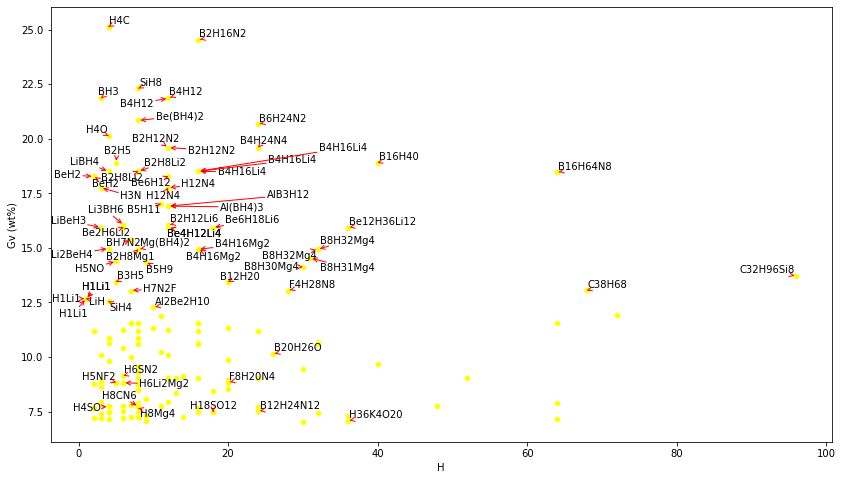

In [263]:
plotscatter(df_H_high_Gravimetric)

In [151]:
df_H_high_Gravimetric['is_diplicated']=df_H_high_Gravimetric["name"].duplicated()

/tmp/ipykernel_23786/4262358252.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_H_high_Gravimetric['is_diplicated']=df_H_high_Gravimetric["name"].duplicated()


In [154]:
df_H_high_Gravimetric_not_du_in_name=df_H_high_Gravimetric[df_H_high_Gravimetric["is_diplicated"]==False]
df_H_high_Gravimetric_du_name=df_H_high_Gravimetric[df_H_high_Gravimetric["is_diplicated"]==True]

In [235]:
#df_H_high_Gravimetric_du_name

In [257]:
def delldeplicated_name(df):
    a=list(df['name'])
    df.index=[i for i in range(len(df))]
    for i  in range(len(list(df["name"]))):
        if i <=len(list(df["name"])):
            for j in range(i+1,len(list(df["name"]))):
                 if j<len(list(df["name"])):
                    if df["name"][j] in list(df["name"]) and list(df["name"]).count(df["name"][j])>=2:
                        df.drop(j,axis=0,inplace=True)
                        df.index=[k for k in range(len(df))]
    return df

In [258]:
df_H_high_Gravimetric_du_name=delldeplicated_name(df_H_high_Gravimetric_du_name)

In [233]:
#df_H_high_Gravimetric_du_name